1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

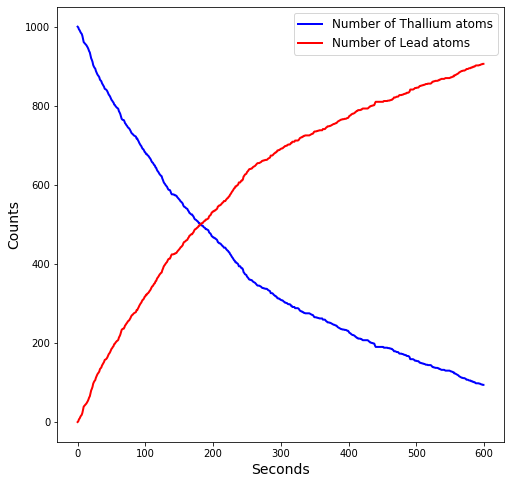

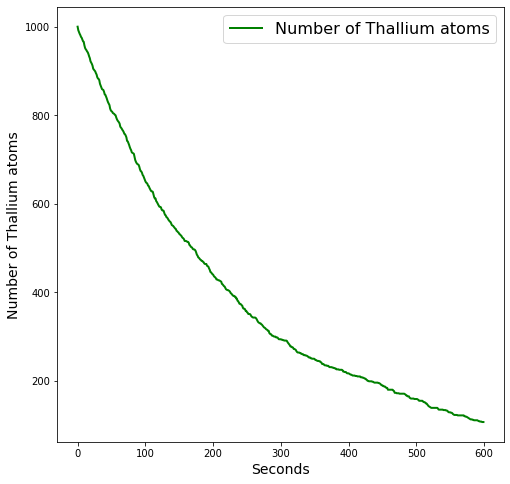

In [9]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt


half_life=3.052*60
timeSim=int(10*60) #lenght of observation time, set to 10 minutes
N_Tl=np.empty((timeSim),'int')
N_Pb=np.empty((timeSim),'int')
N_Tl[0],N_Pb[0]=1000,0

#method 1
for i in range(1,timeSim):
    prb=npr.rand(N_Tl[i-1])
    N_Tl[i]=len(prb[prb>(1-2**(-1./half_life))])
    N_Pb[i]=1000-N_Tl[i]
times=np.array([i for i in range(0,timeSim)])
plt.figure(figsize=(8,8))
plt.plot(times,N_Tl,'b',linewidth=2,label="Number of Thallium atoms")
plt.plot(times,N_Pb,'r',linewidth=2,label="Number of Lead atoms")
plt.xlabel('Seconds', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(prop={'size': 12})
plt.show()

#method 2
def icdf(p):
    return -1*half_life*np.log2(1-p)
u=npr.rand(1000)
v=icdf(u)  #decay times, but I want to see number of atoms
N=[1000,]
for i in range(1,timeSim):
    JustDecayed=v[v-i<0]
    N.append(N[0]-len(JustDecayed))
Events=np.array(N)
plt.figure(figsize=(8,8))
plt.plot(times,Events, 'g',linewidth=2,label="Number of Thallium atoms")
plt.xlabel('Seconds', fontsize=14)
plt.ylabel('Number of Thallium atoms', fontsize=14)
plt.legend(prop={'size': 16})

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

The fraction of bounced back alphas is 0.001522
The condition on b to have back-scattering is b<= 2.952114580206262e-14 while smallest b obtained in the sample is 1.1613662351190023e-15


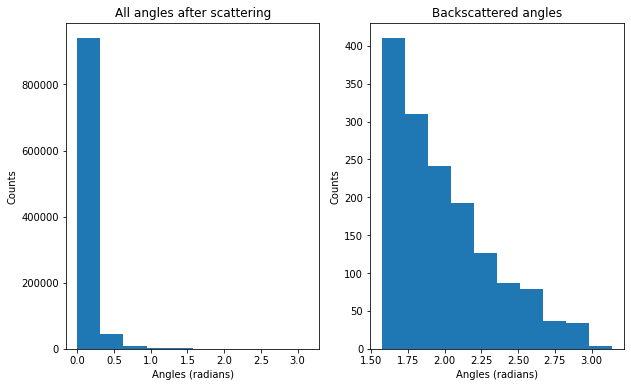

In [18]:
import math as m
#constants
e=1.6E-19     #elementary charge
Z=79          #gold atomic number
E0=8.85E-12   #vacuum permittivity
a0=5.291E-11  #bohr radius
E=7.7E+06*e

def ICDF_b(p): #of the 2D gaussian we keep only the radial part
    return np.sqrt(-2*(a0/100)**2*np.log(1-p))

u=npr.rand(1000000)
b=ICDF_b(u)
thetas=2*np.arctan(Z*e**2/(2*m.pi*E0*E*b))
Bounced=thetas[thetas>(m.pi/2)]
f, (ax, bx) = plt.subplots(1,2,figsize=(10, 6))
ax.hist(thetas,range=(0,m.pi))
ax.set_title('All angles after scattering')
ax.set_xlabel("Angles (radians)")
ax.set_ylabel('Counts')

bx.hist(thetas,range=(m.pi/2,m.pi))
bx.set_title('Backscattered angles')
bx.set_xlabel("Angles (radians)")
bx.set_ylabel('Counts')
#indeed from histograms we see theta has expected distribution

print("The fraction of bounced back alphas is",len(Bounced)*1.0/len(u))
print("The condition on b to have back-scattering is b<=",Z*e**2/(2*m.pi*E0*E),
     "while smallest b obtained in the sample is",b.min())

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [19]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2
#hit-miss method
A=2*1.
N=100000
below=0
for i in range(N):
    #random point in area A
    x=2*npr.random()
    y=npr.random()
    #comparison
    if y<f(x): below+=1
I=A*below/N
#the error from literature (https://www.cheric.org/files/education/cyberlecture/d200303/d200303-901.pdf)
sigma_hm=0.6745*np.sqrt(I*(A-I)/N)
print("For the hit-miss method we obtain",I,"+-",sigma_hm)

#mean value
fs=np.empty((N))
for i in range(N):
    #random point in domain
    x=2*npr.random()
    fs[i]=f(x)
I_m=A*fs.mean()
sigf=fs.std()
sigma_m=A*sigf/np.sqrt(N)
print("For the mean value method we obtain",I_m,"+-",sigma_m)
print("The two result are compatible and the mean value method is slightly more precise")

For the hit-miss method we obtain 1.4542 +- 0.0019002502127551256
For the mean value method we obtain 1.4524238967970353 +- 0.0016655486532252226
The two result are compatible and the mean value method is slightly more precise


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [23]:
#I did it directly with Ndim sphere, to get the 3D case just put Ndim=3
Ndim=10
Vol=2**Ndim  #cube of dimension Ndim, with each edge length = the sphere diameter (2)
Npoints=100000
points=npr.random((Npoints,Ndim))*2-1   #each column is a direction, each row the coordinates of a point
cont=0
#plt.hist(points[:,7])
for i in range(0,len(points)):
    sum=0
    for j in range(0,Ndim):
        sum+=points[i,j]**2
    if sum<1: cont+=1
        
I=cont*Vol/Npoints
sigma=0.6745*m.sqrt(I*(Vol-I)/Npoints)
print("The volume is", I,"+-",sigma) #the true value for Ndim=10 should be around 2.55

The volume is 2.57024 +- 0.10928814301352098


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [3]:
from scipy.integrate import quad
import numpy.random as npr
import numpy as np


def w(x):
    return 1./np.sqrt(x)
def icdf_w(x):
    return x**2
def f_divided_w(x):
    return 1./(np.exp(x)+1)

    
res, err = quad(w, 0, 1)
N=10000
xi=npr.random((N))
x=icdf_w(xi)
F_W=f_divided_w(x)
I=F_W.mean()*res     #mean=sum/N
print("The result is",I)


The result is 0.8385907905165376
